# Importing Libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix

# Importing dataset

In [2]:
dataset = pd.read_csv('dataset.csv')


# Dimension of diabetes dataset


In [3]:
dataset.shape

(768, 8)

In [4]:
dataset.head()

,Gender,Fasting,Pre_Meal,After_Meal,A1c,BMI,Age,Outcome
0,Male,148,214,197,6.7,33.6,50,Diabetes
1,Male,200,225,197,5.5,26.6,31,Diabetes
2,Male,90,105,138,5.5,23.3,32,Normal
3,Male,89,107,134,5.5,28.1,21,Normal
4,Male,50,78,122,5.5,43.1,33,Normal


# Label encoding


In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset["Gender"]=le.fit_transform(dataset["Gender"])
Gender=pd.DataFrame({'Gender':['Male','Female']})
Gender


,Gender
0,Male
1,Female


# Data Visualization


Outcome
Diabetes        [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
Normal          [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
Pre-Diabetes    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
dtype: object

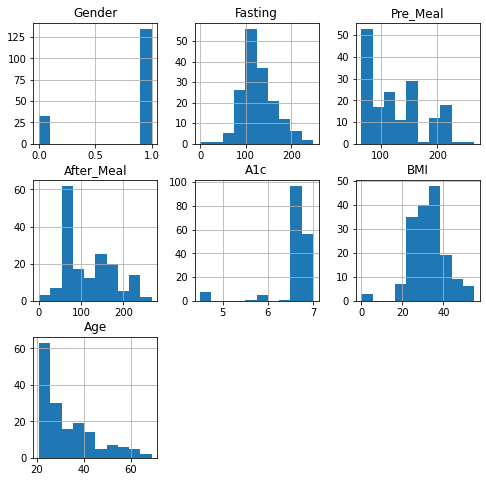

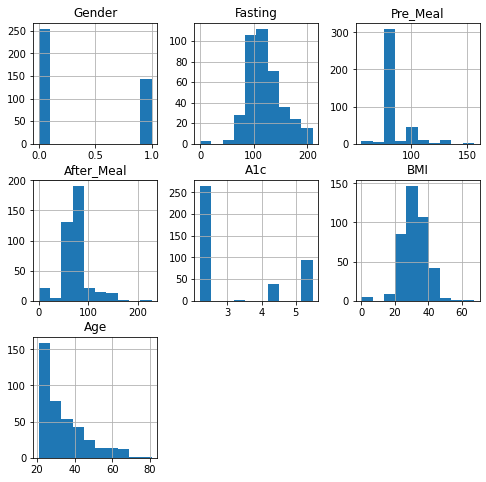

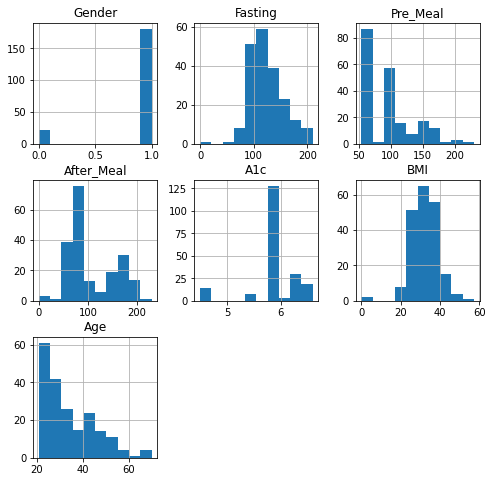

In [6]:
dataset.groupby('Outcome').hist(figsize=(8, 8))

# Mising or Null datapoints

In [7]:
dataset.isnull().sum()
dataset.isna().sum()

Gender        0
Fasting       0
Pre_Meal      0
After_Meal    0
A1c           0
BMI           0
Age           0
Outcome       0
dtype: int64

# Handling invalid data values

In [8]:
print("Total Columns in Gender field which contain 0 value : ", dataset[dataset.Gender == 0].shape[0])
print("Total Columns in Fasting field which contain 0 value : ", dataset[dataset.Fasting == 0].shape[0])
print("Total Columns in Pre_Meal field which contain 0 value : ", dataset[dataset.Pre_Meal == 0].shape[0])
print("Total Columns in After_Meal  field which contain 0 value : ", dataset[dataset.After_Meal  == 0].shape[0])
print("Total Columns in A1c field which contain 0 value : ", dataset[dataset.A1c == 0].shape[0])
print("Total Columns in BMI field which contain 0 value : ", dataset[dataset.BMI == 0].shape[0])
print("Total Columns in Age field which contain 0 value : ", dataset[dataset.Age == 0].shape[0])

Total Columns in Gender field which contain 0 value :  308
Total Columns in Fasting field which contain 0 value :  5
Total Columns in Pre_Meal field which contain 0 value :  0
Total Columns in After_Meal  field which contain 0 value :  27
Total Columns in A1c field which contain 0 value :  0
Total Columns in BMI field which contain 0 value :  10
Total Columns in Age field which contain 0 value :  0


In [9]:
diabetes_mod = dataset[(dataset.After_Meal != 0)  & (dataset.BMI != 0) & (dataset.Fasting != 0) ]
print(diabetes_mod.shape)

(732, 8)


In [11]:
dataset.groupby('Outcome').size()

Outcome
Diabetes        167
Normal          399
Pre-Diabetes    202
dtype: int64

c:\users\sania\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outcome', ylabel='count'>

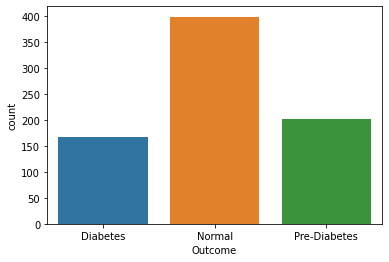

In [12]:
import seaborn as sns
sns.countplot(dataset['Outcome'],label="Count")

# Split dataset into Features and Labels

In [13]:
feature_columns = ['Gender','Fasting','After_Meal','Pre_Meal','A1c','BMI','Age']
X = diabetes_mod[feature_columns].values
X = np.array(X)
y = diabetes_mod['Outcome']
diabetes_mod.head()
X.shape,y.shape

((732, 7), (732,))

# Spliting into Training and Testing dataset

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = diabetes_mod.Outcome,test_size=0.33, random_state=300)

# Chossing the best Classification Model

In [15]:
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVC', SVC()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))




In [16]:
names = []
scores = []
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    kfold = KFold(n_splits=10, random_state=10, shuffle= True) 
    score = cross_val_score(model, X, y, cv=kfold, scoring='accuracy').mean()
    
    names.append(name)
    scores.append(score)
kf_cross_val = pd.DataFrame({'Name': names, 'Score': scores})
print(kf_cross_val)    


  Name     Score
0  KNN  0.728286
1  SVC  0.624306
2   DT  0.968623
3   RF  0.980933


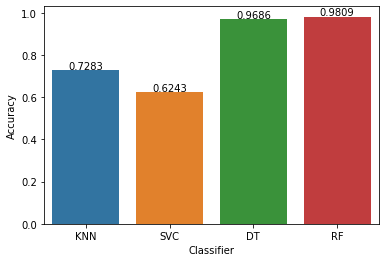

In [17]:
axis = sns.barplot(x = 'Name', y = 'Score', data = kf_cross_val)
axis.set(xlabel='Classifier', ylabel='Accuracy')
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 
    
plt.show()

# Random Forest performs better than the other algorithms.

In [18]:

rf = RandomForestClassifier(max_depth=3,n_estimators=100, random_state=300)
rf.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(rf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf.score(X_test, y_test)))
y_pred=rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm



Accuracy on training set: 0.984
Accuracy on test set: 0.975


array([[ 48,   0,   6],
       [  0, 123,   0],
       [  0,   0,  65]], dtype=int64)

# Results

In [20]:
x_new=np.array([[0,56,172,123,5.9,33.6,50]])
rf.fit(X_train, y_train)
y_pred = rf.predict(x_new)
print("Prediction: {}".format( y_pred))

Prediction: ['Pre-Diabetes']


In [21]:
x_new=np.array([[0,109,110,123,5.1,33.6,50]])
rf.fit(X_train, y_train)
y_pred = rf.predict(x_new)
print("Prediction: {}".format( y_pred))

Prediction: ['Normal']


In [22]:
x_new=np.array([[0,56,172,123,6.7,33.6,50]])
rf.fit(X_train, y_train)
y_pred = rf.predict(x_new)
print("Prediction: {}".format( y_pred))

Prediction: ['Diabetes']


In [23]:
x_new=np.array([[0,200,200,200,4.3,33.6,50]])
rf.fit(X_train, y_train)
y_pred = rf.predict(x_new)
print("Prediction: {}".format( y_pred))

Prediction: ['Diabetes']


In [24]:
x_new=np.array([[0,150,170,190,5.2,33.6,50]])
rf.fit(X_train, y_train)
y_pred = rf.predict(x_new)
print("Prediction: {}".format( y_pred))

Prediction: ['Pre-Diabetes']


In [25]:
x_new=np.array([[1,220,220,210,6,33.6,50]])
rf.fit(X_train, y_train)
y_pred = rf.predict(x_new)
print("Prediction: {}".format( y_pred))

Prediction: ['Diabetes']
